In [164]:
import pandas as pd
from datetime import datetime
# Load the data
data = pd.read_csv("raw.csv")

In [165]:

data.head().T

,0,1,2,3,4
JobID,1,2,3,4,5
SubmitTime,1136070690,1136072890,1136074695,1136074754,1136074756
WaitTime,0,1,1,2,2
RunTime,11,46,197831,197682,197552
NProc,1,1,1,1,1
UsedCPUTime,4.0,3.0,0.0,0.0,0.0
UsedMemory,35848.0,49216.0,0.0,0.0,0.0
ReqNProcs,1,1,1,1,1
ReqTime,259200.0,900.0,259200.0,259200.0,259200.0
ReqMemory,-1.0,-1.0,-1.0,-1.0,-1.0


In [166]:
data.columns

Index(['JobID', 'SubmitTime', 'WaitTime', 'RunTime', 'NProc', 'UsedCPUTime',
       'UsedMemory', 'ReqNProcs', 'ReqTime', 'ReqMemory', 'Status', 'UserID',
       'GroupID', 'ExecutableID', 'QueueID', 'PartitionID', 'OrigSiteID',
       'LastRunSiteID', 'JobStructure', 'JobStructureParams', 'UsedNetwork',
       'UsedLocalDiskSpace', 'UsedResources', 'ReqPlatform', 'ReqNetwork',
       'ReqLocalDiskSpace', 'ReqResources', 'VOID', 'ProjectID'],
      dtype='object')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404176 entries, 0 to 404175
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   JobID               404176 non-null  int64  
 1   SubmitTime          404176 non-null  int64  
 2   WaitTime            404176 non-null  int64  
 3   RunTime             404176 non-null  int64  
 4   NProc               404176 non-null  int64  
 5   UsedCPUTime         404176 non-null  float64
 6   UsedMemory          404176 non-null  float64
 7   ReqNProcs           404176 non-null  int64  
 8   ReqTime             404176 non-null  float64
 9   ReqMemory           404176 non-null  float64
 10  Status              404176 non-null  int64  
 11  UserID              404176 non-null  object 
 12  GroupID             404176 non-null  object 
 13  ExecutableID        404176 non-null  object 
 14  QueueID             404176 non-null  object 
 15  PartitionID         404176 non-nul

In [168]:
#look for missing values (which is columns with -1 values)
miss_val_pourcentage = {}
for column in data.columns:
    # calculate the pourcentage of -1 values in the column
    pourcentage = len(data[data[column] == -1]) / len(data)
    miss_val_pourcentage[column] = pourcentage



In [169]:
from matplotlib import pyplot as plt
import seaborn as sns

# convert the dictionary to a dataframe
for column in miss_val_pourcentage:
    miss_val_pourcentage[column] = miss_val_pourcentage[column] * 100


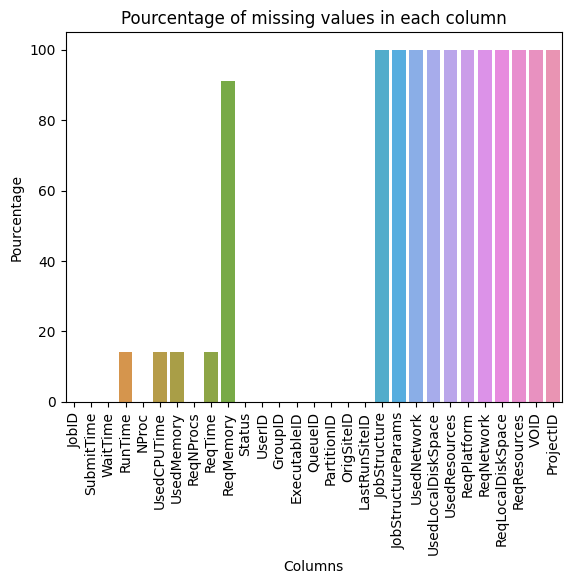

In [170]:
sns.barplot(x=list(miss_val_pourcentage.keys()), y=list(miss_val_pourcentage.values()))
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Pourcentage")
plt.title("Pourcentage of missing values in each column")
plt.savefig("missing_values.png")
plt.show()

In [171]:
# remove columns with more than 50% missing values
columns_to_remove = []
for column in miss_val_pourcentage:
    if miss_val_pourcentage[column] > 50:
        columns_to_remove.append(column)

data = data.drop(columns_to_remove+['JobID'], axis=1)


In [172]:
data_copy = data.copy()

In [173]:
data.head().T

,0,1,2,3,4
SubmitTime,1136070690,1136072890,1136074695,1136074754,1136074756
WaitTime,0,1,1,2,2
RunTime,11,46,197831,197682,197552
NProc,1,1,1,1,1
UsedCPUTime,4.0,3.0,0.0,0.0,0.0
UsedMemory,35848.0,49216.0,0.0,0.0,0.0
ReqNProcs,1,1,1,1,1
ReqTime,259200.0,900.0,259200.0,259200.0,259200.0
Status,1,1,1,1,1
UserID,U1023S0,U1018S0,U1033S0,U1033S0,U1033S0


In [ ]:
# label encoder for categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()



for feature in cat_features:
    new_data[feature] = encoder.fit_transform(new_data[feature])

In [174]:
data['SubmitTime'] = pd.to_datetime(data['SubmitTime'],unit='s')
data.set_index('SubmitTime', inplace=True)


In [126]:
data.resample('15T').count()['NProc']

SubmitTime
2005-12-31 23:00:00    2
2005-12-31 23:15:00    3
2005-12-31 23:30:00    0
2005-12-31 23:45:00    1
2006-01-01 00:00:00    1
                      ..
2006-12-31 21:45:00    5
2006-12-31 22:00:00    8
2006-12-31 22:15:00    4
2006-12-31 22:30:00    0
2006-12-31 22:45:00    1
Freq: 15T, Name: NProc, Length: 35040, dtype: int64

In [175]:
new_data = pd.DataFrame(columns=data.columns, index=data.resample('30T').count()['NProc'].index)
# new_data.index = data.resample('15T').count()['NProc'].index
new_data

,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status,UserID,GroupID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID
SubmitTime,,,,,,,,,,,,,,,
2005-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-31 20:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
data_copy['SubmitTime'] = pd.to_datetime(data_copy['SubmitTime'],unit='s')

In [177]:
from tqdm import tqdm
data_for_cell = data_copy.copy()
rows_with_zero_rows = []
for i in tqdm(range(len(new_data))):
    data_60min = data_for_cell.loc[data_for_cell['SubmitTime'] < new_data.index[i]]
    if data_60min.shape[0] == 0:
        rows_with_zero_rows.append(i)
    data_for_cell = data_for_cell.loc[data_for_cell['SubmitTime']  >= new_data.index[i]]

  0%|          | 0/17520 [00:00<?, ?it/s]

100%|██████████| 17520/17520 [12:57<00:00, 22.54it/s] 


In [178]:
len(rows_with_zero_rows)

1109

In [179]:
from tqdm import tqdm
data_for_cell = data_copy.copy()
cat_features = ['UserID', 'GroupID', 'ExecutableID', 'QueueID', 'PartitionID', 'OrigSiteID', 'LastRunSiteID','Status']
other_features = ['WaitTime', 'RunTime', 'UsedCPUTime','UsedMemory', 'ReqNProcs', 'ReqTime']
# take the first 15 minutes record
for i in tqdm(range(len(new_data))):
    if i in rows_with_zero_rows:
        new_data.loc[new_data.index[i], :] = 0
        data_for_cell = data_for_cell.loc[data_for_cell['SubmitTime'] >= new_data.index[i]]
        continue
    data_60min = data_for_cell.loc[data_for_cell['SubmitTime'] < new_data.index[i]]
    # replace the cat_features in new_data with the most frequent value in the 60 minutes
    for feature in cat_features:
        new_data.loc[new_data.index[i], feature] = data_60min[feature].mode()[0]
    # replace the other features with the mean value in the 60 minutes
    for feature in other_features:
        new_data.loc[new_data.index[i], feature] = data_60min[feature].mean()
    # give the workload as the total number of processors
    new_data.loc[new_data.index[i], 'Workload'] = data_60min['NProc'].sum()  
    data_for_cell = data_for_cell.loc[data_for_cell['SubmitTime'] >= new_data.index[i]]

  0%|          | 0/17520 [00:00<?, ?it/s]

100%|██████████| 17520/17520 [3:07:21<00:00,  1.56it/s]     


In [195]:
new_data.head()

,WaitTime,RunTime,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status,UserID,GroupID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID,Workload
SubmitTime,,,,,,,,,,,,,,,
2005-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0
2005-12-31 23:30:00,82160.0,111237.2,31421.2,131353.6,1.0,259200.0,1,U2035S1,G6,X1,Q2,1,clrlcgce02,clrlcgce02,5.0
2006-01-01 00:00:00,1.0,46.0,3.0,49216.0,1.0,900.0,1,U1018S0,G1,X1,Q2,1,clrlcgce01,clrlcgce01,1.0
2006-01-01 00:30:00,525904.4,158116.2,0.0,7142.4,1.0,208440.0,1,U1033S0,G6,X1,Q4,1,clrlcgce01,clrlcgce01,5.0
2006-01-01 01:00:00,1412354.0,9410.0,9099.0,258102.0,1.0,132300.0,1,U2035S1,G1,X1,Q2,1,clrlcgce02,clrlcgce02,2.0


In [184]:
new_data = new_data.drop(columns=['NProc'],axis=1)

In [186]:
new_data = new_data.fillna(0)

In [188]:
workloads = new_data['Workload'].sort_values().unique()

In [189]:
workloads

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 15

In [209]:
num_bins = 10
new_data['workload'] = pd.cut(new_data['Workload'], bins=num_bins, labels=False)

In [197]:
new_data.head()

,WaitTime,RunTime,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status,UserID,GroupID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID,Workload,workload
SubmitTime,,,,,,,,,,,,,,,,
2005-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0
2005-12-31 23:30:00,82160.0,111237.2,31421.2,131353.6,1.0,259200.0,1,U2035S1,G6,X1,Q2,1,clrlcgce02,clrlcgce02,5.0,0
2006-01-01 00:00:00,1.0,46.0,3.0,49216.0,1.0,900.0,1,U1018S0,G1,X1,Q2,1,clrlcgce01,clrlcgce01,1.0,0
2006-01-01 00:30:00,525904.4,158116.2,0.0,7142.4,1.0,208440.0,1,U1033S0,G6,X1,Q4,1,clrlcgce01,clrlcgce01,5.0,0
2006-01-01 01:00:00,1412354.0,9410.0,9099.0,258102.0,1.0,132300.0,1,U2035S1,G1,X1,Q2,1,clrlcgce02,clrlcgce02,2.0,0


In [207]:
new_data = pd.read_csv('30min_window_data.csv')

In [212]:


# devide the first class also on bins
num_bins = 10
major_class_df = new_data.loc[new_data['workload'] == 0]
major_class_df['workload'] = pd.cut(major_class_df['Workload'], bins=num_bins, labels=False)

index = major_class_df.index
# give to each class the same number of bins + 9

    

C:\Users\Mustapha\AppData\Local\Temp\ipykernel_16236\2247110556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_class_df['workload'] = pd.cut(major_class_df['Workload'], bins=num_bins, labels=False)


In [213]:
major_class_df['workload'].unique()

array([0, 1, 7, 8, 3, 2, 5, 9, 4, 6], dtype=int64)

In [214]:
major_class_df['workload'] = major_class_df['workload'] + 10

C:\Users\Mustapha\AppData\Local\Temp\ipykernel_16236\2648032846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_class_df['workload'] = major_class_df['workload'] + 10


In [205]:
major_class_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14763 entries, 2005-12-31 23:00:00 to 2006-12-31 22:30:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WaitTime       14763 non-null  float64
 1   RunTime        14763 non-null  float64
 2   UsedCPUTime    14763 non-null  float64
 3   UsedMemory     14763 non-null  float64
 4   ReqNProcs      14763 non-null  float64
 5   ReqTime        14763 non-null  float64
 6   Status         14763 non-null  int64  
 7   UserID         14763 non-null  object 
 8   GroupID        14763 non-null  object 
 9   ExecutableID   14763 non-null  object 
 10  QueueID        14763 non-null  object 
 11  PartitionID    14763 non-null  int64  
 12  OrigSiteID     14763 non-null  object 
 13  LastRunSiteID  14763 non-null  object 
 14  Workload       14763 non-null  float64
 15  workload       14763 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 1.9+ MB


In [215]:
new_data.loc[index, 'workload'] = major_class_df['workload']

In [216]:
new_data['workload'].unique()

array([10, 11, 17,  1, 18,  2, 13, 12, 15, 19, 14, 16,  3,  4,  5,  6,  7,
        9,  8], dtype=int64)

In [ ]:
# rename class

<Axes: >

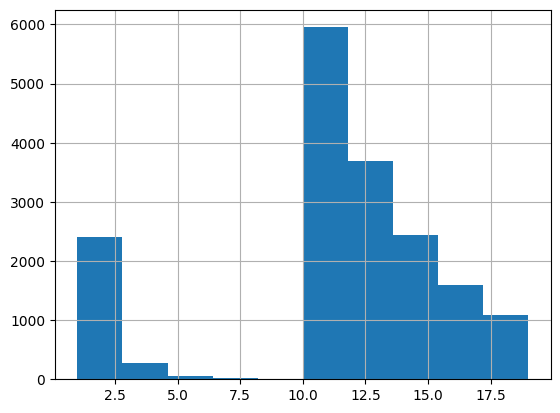

In [217]:
new_data['workload'].hist()

In [ ]:
import torch 

class CNN_Bilstm_Classifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNN_Bilstm_Classifier, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.cnn = torch.nn.Conv1d(input_size, hidden_size, kernel_size=3, stride=1, padding=1)
        self.relu = torch.nn.ReLU()
        self.lstm = torch.nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = torch.nn.Linear(hidden_size*2, num_classes)
        self.softmax = torch.nn.Softmax(dim=1)
        self.dropout = torch.nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.cnn(x)
        x = self.relu(x)
        x = self.dropout(x)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        x = self.softmax(x)
        return x



In [218]:
new_data.to_csv('30min_window_data19.csv', index=False)

In [162]:
sorted_workloads = new_data['Workload'].sort_values()


NameError: name 'lent' is not defined

In [191]:
len(sorted_workloads)

8760

In [ ]:
sorted_workloads = data['workload'].sort_values()
num_bins = 10
split_on = int(len(sorted_workloads)/10)
Workloads = {}
for i in range(10):
  Workloads[i] = (i+1)*split_on

def assign_class(workload):
    for i in range(10):
        if workload <= sorted_workloads[Workloads[i]]:
            return i+1
    return 10

new_data['class'] = new_data['Workload'].apply(assign_class)    

In [ ]:
# sort workloads and give them a number
workloads = new_data['Workload'].sort_values()
workloads_dict = {}
for i in range(len(workloads)):
    workloads_dict[workloads[i]] = i
new_data['Workload'] = new_data['Workload'].map(workloads_dict)

In [149]:
new_data = new_data.drop(columns=['NProc'])

In [153]:
new_data.describe()

,Workload
count,8760.000000
mean,39.680365
std,49.700529
min,0.000000
25%,10.000000
50%,26.000000
75%,51.000000
max,625.000000


In [147]:
cat_features

['UserID',
 'GroupID',
 'ExecutableID',
 'QueueID',
 'PartitionID',
 'OrigSiteID',
 'LastRunSiteID',
 'Status']

In [ ]:
# label encoder for categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in cat_features:
    new_data[feature] = encoder.fit_transform(new_data[feature])

<Axes: xlabel='SubmitTime'>

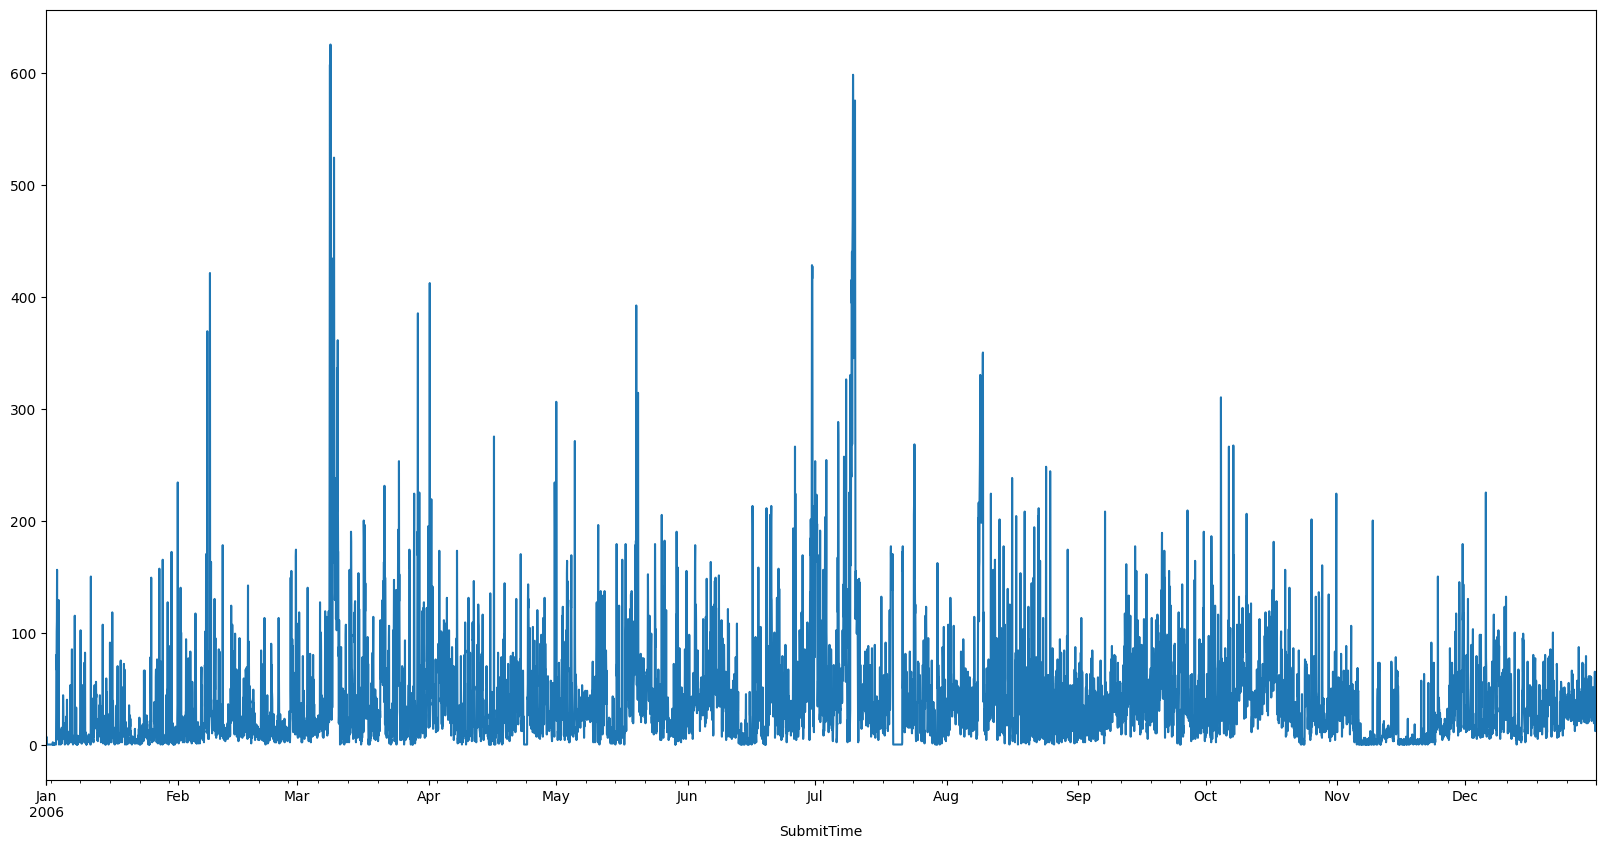

In [144]:
new_data['Workload'].plot(figsize=(20, 10))

In [190]:
new_data.to_csv("30min_window_data.csv")

In [146]:
# format the workload type to int
new_data['Workload'] = new_data['Workload'].astype(int)


In [37]:
# add dattime featues from timestamp
data['timestamp'] = pd.to_datetime(data['SubmitTime'],unit='s')
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute

: 

In [ ]:
data = data[['year','month','day','hour','minute','SubmitT']]

In [24]:
data.set_index('timestamp', inplace=True)
# Resample the data in 15-minute intervals and sum the 'NProc' values and take the mode of other features
data = data.resample('15T').agg({'NProc':'sum','year':'first', 'month':'first', 'day':'first', 'hour':'first', 'minute':'first','UserID':'first','GroupID':'first','ExecutableID':'first','QueueID':'first','PartitionID':'first','OrigSiteID':'first','LastRunSiteID':'first'})

IndexError: positional indexers are out-of-bounds

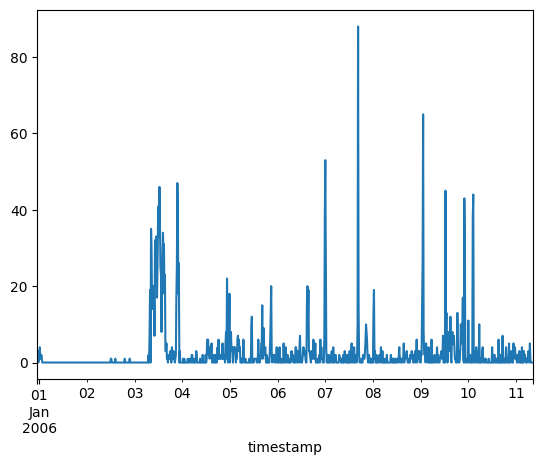

In [32]:
import matplotlib.pyplot as plt
data_newproc = data_new.iloc[:1000,[4]]
data_newreqpro = data_new.iloc[:1000,[7]]
data_newproc['NProc'].plot()  
data_newreqpro['ReqNProcs'].iloc[[1000]].plot()   
plt.show()

In [ ]:
train_size = int(len(data_new) * 0.8)
train_data, test_data = data_new[:train_size], data_new[train_size:]

In [ ]:
Train_X, Train_y = train_data.drop('NProc', axis=1), train_data['NProc']
Test_X, Test_y = test_data.drop('NProc', axis=1), test_data['NProc']

In [25]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2005-12-31 23:00:00 to 2006-12-31 22:45:00
Freq: 15T
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobID               35040 non-null  int64  
 1   SubmitTime          35040 non-null  int64  
 2   WaitTime            35040 non-null  int64  
 3   RunTime             35040 non-null  int64  
 4   NProc               35040 non-null  int64  
 5   UsedCPUTime         35040 non-null  float64
 6   UsedMemory          35040 non-null  float64
 7   ReqNProcs           35040 non-null  int64  
 8   ReqTime             35040 non-null  float64
 9   ReqMemory           35040 non-null  float64
 10  Status              35040 non-null  int64  
 11  UserID              35040 non-null  object 
 12  GroupID             35040 non-null  object 
 13  ExecutableID        35040 non-null  object 
 14  QueueID             35040 non-null  object 
 15  Partitio

In [13]:
# encode catergorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns.remove('JobID'):
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

data.head().T

,0,1,2,3,4
JobID,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
SubmitTime,1.136071e+09,1.136073e+09,1.136075e+09,1.136075e+09,1.136075e+09
WaitTime,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
RunTime,1.100000e+01,4.600000e+01,1.978310e+05,1.976820e+05,1.975520e+05
NProc,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
UsedCPUTime,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
UsedMemory,3.584800e+04,4.921600e+04,0.000000e+00,0.000000e+00,0.000000e+00
ReqNProcs,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
ReqTime,2.592000e+05,9.000000e+02,2.592000e+05,2.592000e+05,2.592000e+05
ReqMemory,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00


In [8]:
# add dattime featues from timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'],unit='s')
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute

KeyError: 'timestamp'

In [7]:
data.set_index('timestamp', inplace=True)
# Resample the data in 15-minute intervals and sum the 'NProc' values
data_new = data.resample("15T").sum()

KeyError: "None of ['timestamp'] are in the columns"

In [ ]:
# devide data to train and test
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
